In [1]:
# Project 5: Quality Prediction in Ore Mining

In [2]:
# Importing necessary libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
import math
import re

In [3]:
df=pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [5]:
df.isnull().any()

date                            False
% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool

In [6]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [7]:
df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-06-16 15:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


In [8]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
737448    False
737449    False
737450    False
737451    False
737452    False
Length: 737453, dtype: bool

In [10]:
df = df.replace(',', '.', regex=True)
columns_to_convert = [ '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [12]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [13]:
df.drop('date', axis=1, inplace=True)
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


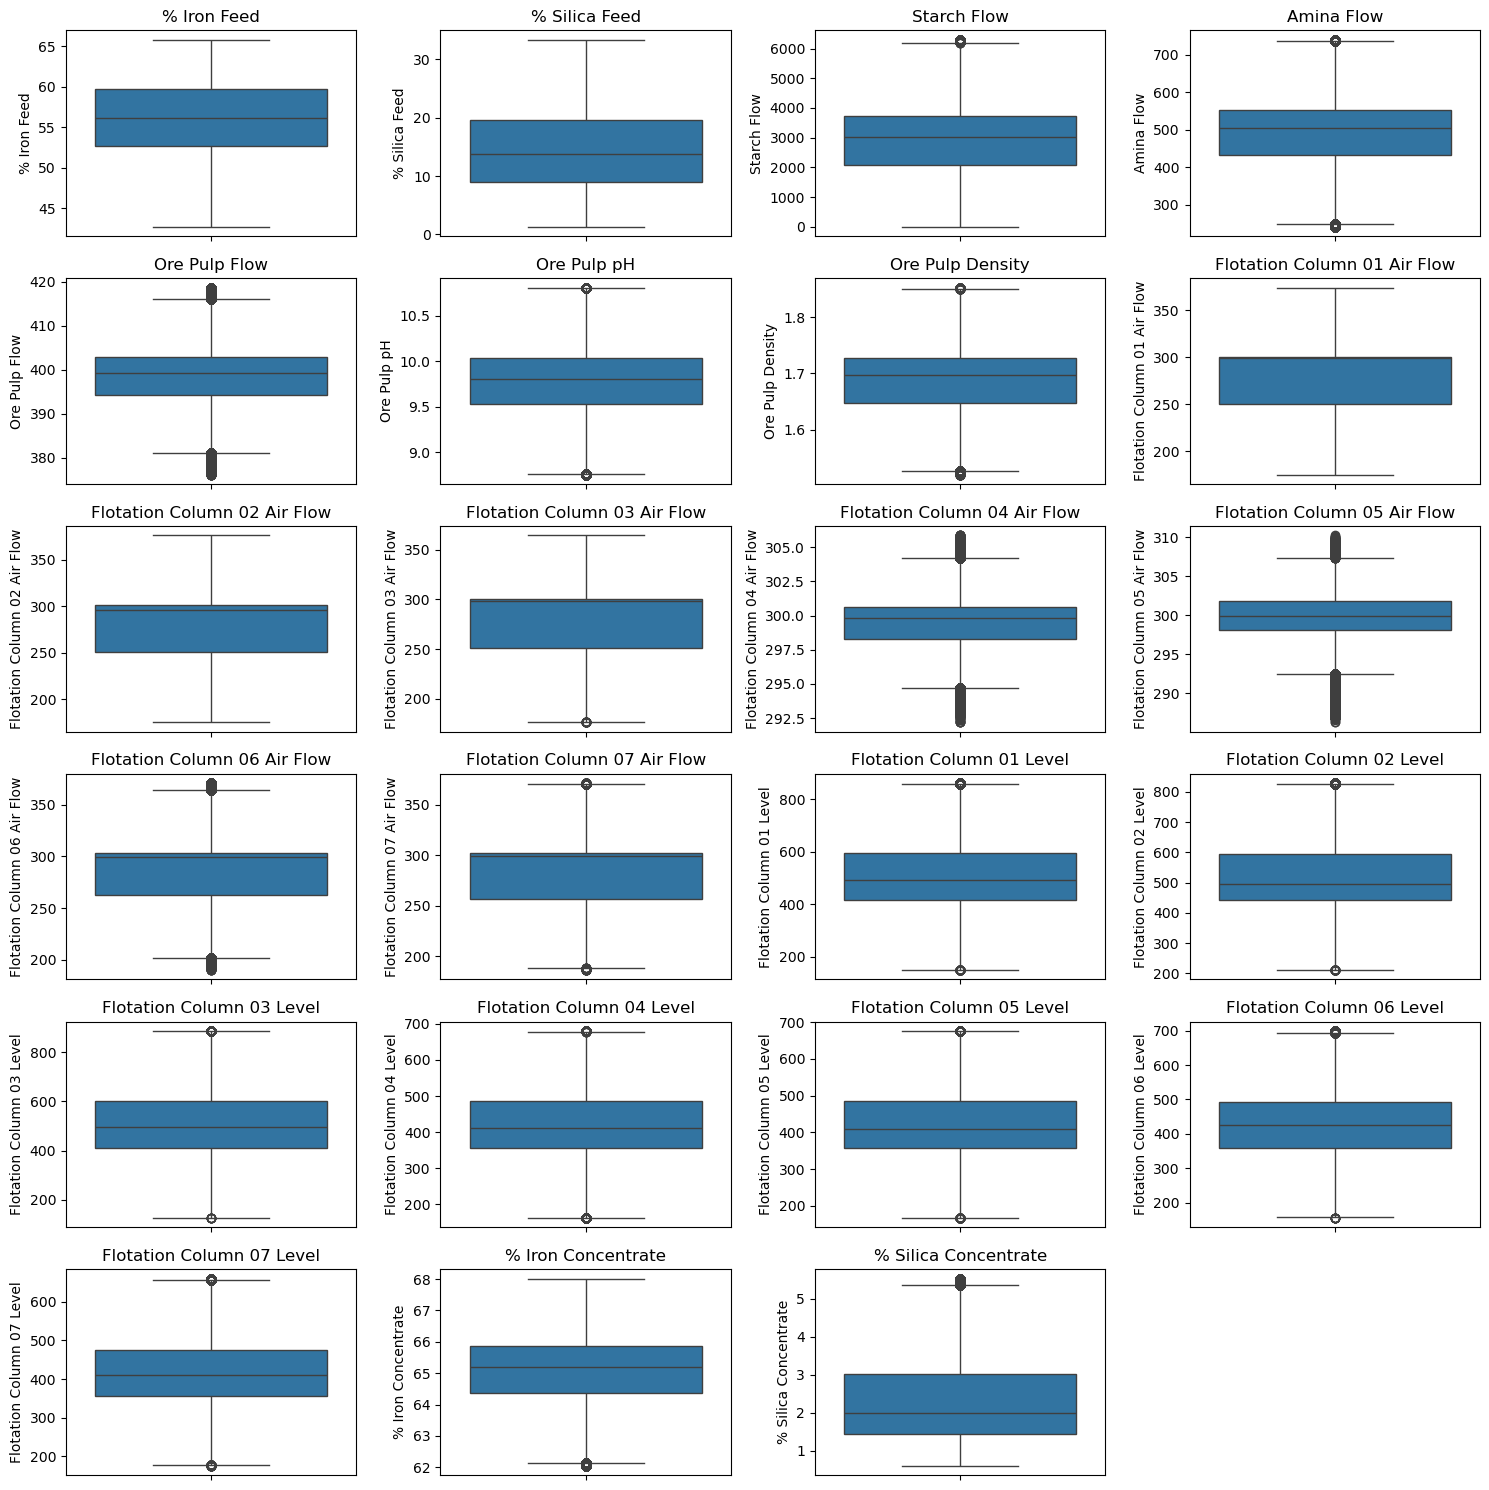

In [14]:
# to check outliers in numerical columns using boxplot

plt.figure(figsize=(15,15))
Numericals=[ '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
plot=1
for i in Numericals:
    plt.subplot(6,4,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1
    plt.tight_layout()


In [15]:
# Removing outliers using IQR method
Numericals=['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
for i in Numericals:
    flag=True
    while(flag):
        q25,q75=np.percentile(df[i],[25,75])
        IQR=q75-q25
        lower_limit=q25-1.5*IQR
        upper_limit=q75+1.5*IQR
        if(df[i]<lower_limit).sum() or (df[i]>upper_limit).sum():
            df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])
            df[i]=np.where(df[i]<lower_limit,upper_limit,df[i])
            flag=True
        else:
            flag=False

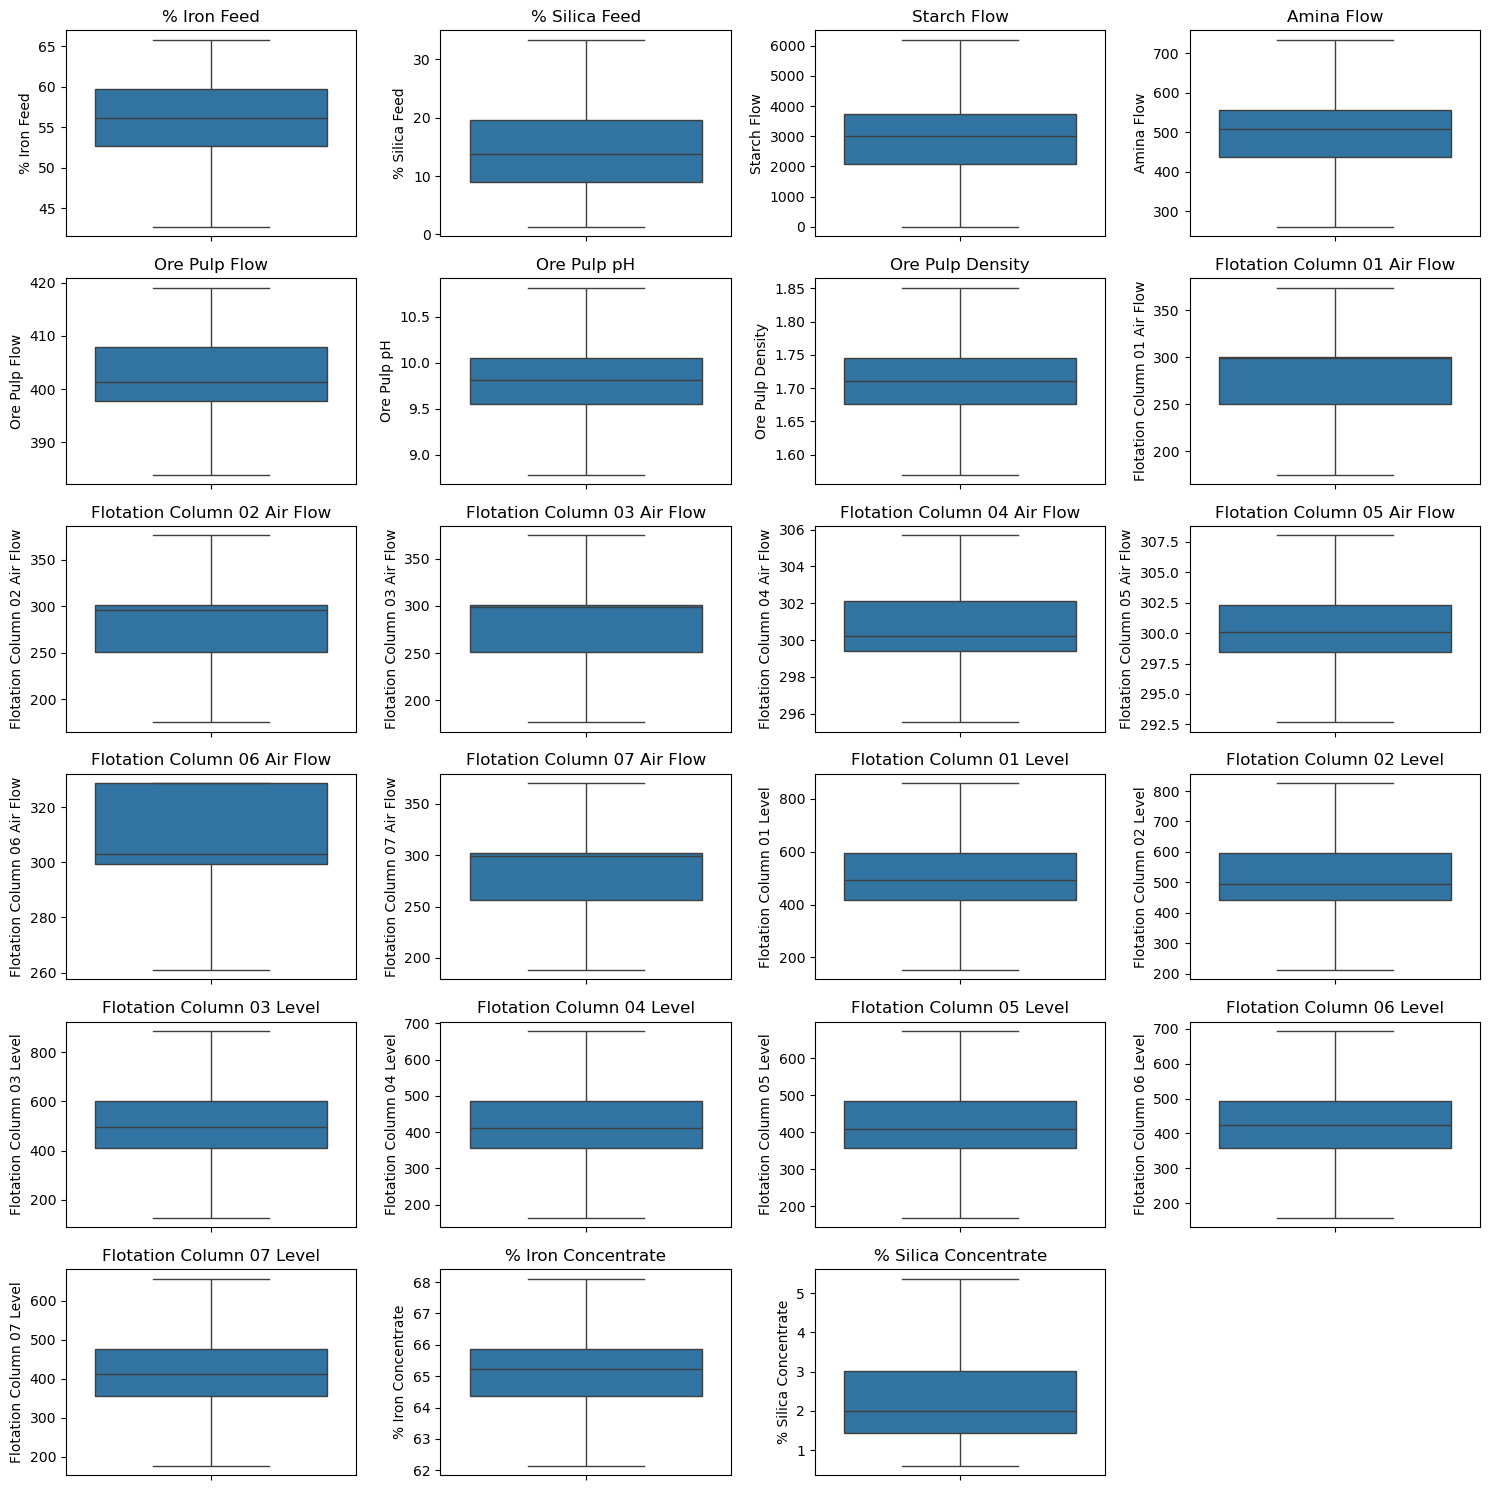

In [16]:
# rechecking

plt.figure(figsize=(15,15))
Numericals=[ '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
plot=1
for i in Numericals:
    plt.subplot(6,4,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1
    plt.tight_layout()


In [17]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,49.75,23.20,2692.20,500.488,419.105,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [18]:
# Split -dependent and independent variables

x=df.drop(['% Silica Concentrate'],axis=1)
x

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,328.6425,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,328.6425,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,328.6425,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,328.6425,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,328.6425,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,328.6425,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,328.6425,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27
737450,49.75,23.20,2692.20,500.488,419.105,9.61874,1.65338,303.662,307.397,299.487,...,328.6425,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,328.6425,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27


In [19]:
y=df['% Silica Concentrate']
y

0         1.31
1         1.31
2         1.31
3         1.31
4         1.31
          ... 
737448    1.71
737449    1.71
737450    1.71
737451    1.71
737452    1.71
Name: % Silica Concentrate, Length: 737453, dtype: float64

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48)
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

516217 516217
221236 221236


In [21]:
model = CatBoostRegressor()  
model.fit(xtrain, ytrain)

Learning rate set to 0.109852
0:	learn: 1.0429731	total: 264ms	remaining: 4m 23s
1:	learn: 0.9727645	total: 348ms	remaining: 2m 53s
2:	learn: 0.9131626	total: 425ms	remaining: 2m 21s
3:	learn: 0.8620876	total: 495ms	remaining: 2m 3s
4:	learn: 0.8183695	total: 576ms	remaining: 1m 54s
5:	learn: 0.7813077	total: 683ms	remaining: 1m 53s
6:	learn: 0.7498995	total: 745ms	remaining: 1m 45s
7:	learn: 0.7233163	total: 804ms	remaining: 1m 39s
8:	learn: 0.7008401	total: 860ms	remaining: 1m 34s
9:	learn: 0.6818455	total: 915ms	remaining: 1m 30s
10:	learn: 0.6653470	total: 982ms	remaining: 1m 28s
11:	learn: 0.6517779	total: 1.04s	remaining: 1m 25s
12:	learn: 0.6400559	total: 1.12s	remaining: 1m 25s
13:	learn: 0.6305191	total: 1.19s	remaining: 1m 24s
14:	learn: 0.6210825	total: 1.29s	remaining: 1m 24s
15:	learn: 0.6129291	total: 1.37s	remaining: 1m 24s
16:	learn: 0.6060528	total: 1.44s	remaining: 1m 23s
17:	learn: 0.6000367	total: 1.5s	remaining: 1m 22s
18:	learn: 0.5952008	total: 1.57s	remaining: 1

In [22]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [23]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [24]:
model.score(xtest,ytest)

0.9454080485839919

In [25]:
# testing

output1 = model.predict([[3.91, 18.19, 2,533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567,711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output1

2.830753115433737

In [26]:
# testing 

output2 = model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output2

1.1441001176133312

In [27]:
# testing 

output3 = model.predict([[37.42, 19.63, 2,617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output3 

3.225812196287489

In [28]:
# testing 

output4 = model.predict([[42.89, 23.75, 2,489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output4 

2.793697547092927

In [29]:
ypred=model.predict(xtest)
ypred

array([2.01235568, 1.75270182, 4.49800492, ..., 1.2286433 , 1.20463583,
       1.15104659])

In [30]:
import math

In [31]:
mse=mean_squared_error(ytest,ypred)
print("Mean Square Error:-",mse)

rmse=math.sqrt(mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.06883828441018879
Root Mean Square Error:- 0.2623705097951917


In [32]:
evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",evs)

Explained Variance score:- 0.9454080979048509


In [33]:

r_model = RandomForestRegressor(n_jobs=-1)
r_model.fit(xtrain, ytrain)

RandomForestRegressor(n_jobs=-1)

In [34]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [35]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [36]:
r_model.score(xtest,ytest)

0.9984548944751758

In [37]:
# testing
output1 = r_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567,711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output1

1.5389999999999997

In [38]:
# testing 
output2 = r_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output2

1.1000000000000056

In [39]:
# testing

output3 = r_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output3

4.661539747856998

In [40]:
#testing

output4 = r_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474,290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output4

4.996049171264994

In [41]:
ypred=r_model.predict(xtest)
ypred

array([2.2154, 1.6348, 4.4269, ..., 1.1056, 1.2626, 1.05  ])

In [42]:
mse=mean_squared_error(ytest,ypred)
print("Mean Square Error:-",mse)

rmse=math.sqrt(mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.001948316753711323
Root Mean Square Error:- 0.044139741205758365


In [43]:
rf_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",rf_evs)

Explained Variance score:- 0.998454898362529


In [44]:

l_model = LinearRegression()
l_model.fit(xtrain, ytrain)

LinearRegression()

In [45]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [46]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [47]:
l_model.score(xtest,ytest)

0.6472328246673318

In [48]:
# testing 

output1 = l_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567, 711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output1 

0.5904980095305419

In [49]:
# testing 

output2 = l_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,
        864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output2

1.6243412320058255

In [50]:
# testing

output3 = l_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output3 

-1.8569374775161478

In [51]:
# testing

output4 = l_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output4 

-0.9603735785136323

In [52]:
ypred=l_model.predict(xtest)
ypred

array([2.26509075, 1.95814324, 3.51792404, ..., 2.00266667, 1.44722497,
       2.72813137])

In [53]:
mse=mean_squared_error(ytest,ypred)
print("Mean Square Error:-",mse)

rmse=math.sqrt(mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.444825409538453
Root Mean Square Error:- 0.6669523292848245


In [54]:
lr_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",lr_evs)

Explained Variance score:- 0.6472379875307115


In [55]:
x_model = XGBRegressor()
x_model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [57]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [58]:
x_model.score(xtest,ytest)

0.9420372630785578

In [59]:
# testing 

output1 = x_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567,711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output1 

1.7450404

In [60]:
# testing 

output2 = x_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output2 

1.1887438

In [61]:
# testing

output3 = x_model.predict([[37.42, 19.63, 2617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output3

4.52922

In [62]:
# testing

output4 = x_model.predict([[42.89, 23.75, 2489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output4

4.1297755

In [63]:
ypred=x_model.predict(xtest)
ypred

array([2.1928205, 1.7908981, 4.6064506, ..., 1.5387056, 1.2103037,
       0.9267341], dtype=float32)

In [64]:
mse=mean_squared_error(ytest,ypred)
print("Mean Square Error:-",mse)

rmse=math.sqrt(mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.07308871117256262
Root Mean Square Error:- 0.2703492392675863


In [65]:
xgb_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",xgb_evs)

Explained Variance score:- 0.9420372676061668


In [66]:
d_model = DecisionTreeRegressor()
d_model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [67]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [68]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [69]:
d_model.score(xtest,ytest)

0.9940110708604699

In [70]:
# testing 

output1 = d_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567,711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output1 

1.72

In [71]:
# testing

output2 = d_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output2 

1.1000000000000134

In [72]:
# testing 

output3 = d_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output3

4.9119889503

In [73]:
# testing

output4 = d_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output4 

4.9759116022

In [74]:
ypred=d_model.predict(xtest)
ypred

array([2.21, 1.6 , 4.4 , ..., 1.09, 1.26, 1.05])

In [75]:
mse=mean_squared_error(ytest,ypred)
print("Mean Square Error:-",mse)

rmse=math.sqrt(mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.007551801991429671
Root Mean Square Error:- 0.08690110466173415


In [76]:
dt_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",dt_evs)

Explained Variance score:- 0.9940111346000001


In [77]:
s_model = SVR(kernel='linear',C=0.5,epsilon=0.2,max_iter=1000)
s_model.fit(xtrain, ytrain)

SVR(C=0.5, epsilon=0.2, kernel='linear', max_iter=1000)

In [78]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [79]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [80]:
s_model.score(xtest,ytest)

-47.62046007813514

In [81]:
# testing

output1 = s_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567,711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output1 

-12.531645262361987

In [82]:
# testing 

output2 = s_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output2 

-3.528084439552937

In [83]:
# testing

output3 = s_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output3 

-12.635785799393513

In [84]:
# testing

output4 = s_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output4 

-13.61966737272908

In [85]:
ypred=s_model.predict(xtest)
ypred

array([ 4.41769334, -2.52174655, 10.84614272, ...,  1.0200125 ,
        9.50137536,  5.37304887])

In [86]:
mse=mean_squared_error(ytest,ypred)
print("Mean Square Error:-",mse)

rmse=math.sqrt(mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 61.308470794679494
Root Mean Square Error:- 7.829972592204872


In [87]:
sr_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",sr_evs)

Explained Variance score:- -46.66141518802099


Text(0, 0.5, 'EVS Score')

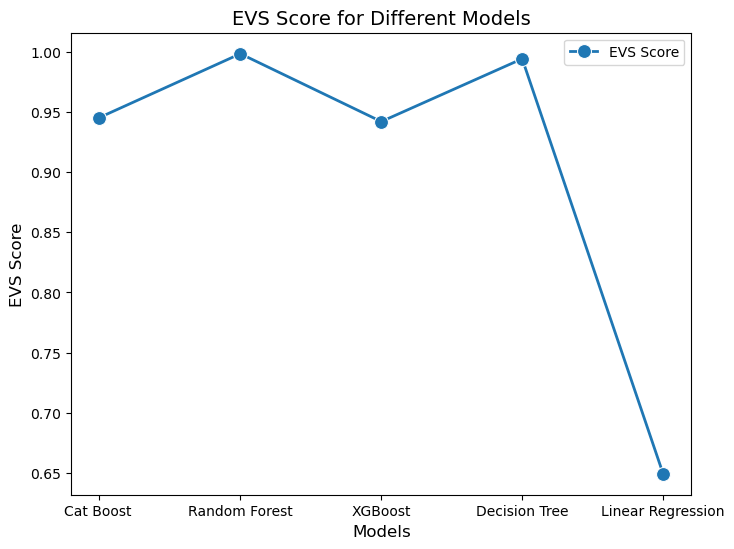

In [88]:
evs_score = [0.9454080979048509 ,0.9984714402572925,0.9420372676061668,0.9942718010080314,0.6492379875307115]
models = ['Cat Boost ', 'Random Forest', 'XGBoost', 'Decision Tree','Linear Regression']

plt.figure(figsize=(8, 6))

sns.lineplot(x=models, y=evs_score, marker='o', linewidth=2, label='EVS Score',markersize=10)

plt.title('EVS Score for Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('EVS Score', fontsize=12)